In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from src.winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

In [3]:
import warnings
warnings.simplefilter('ignore')

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Damage Dataset

In [4]:
mse_url = "output/ringsranking_mse_sixteen.csv"
rings_url = "output/ringsranking_rings_sixteen.csv"
df_ringsranking_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/ringsranking_mse_thirtytwo.csv"
rings_url = "output/ringsranking_rings_thirtytwo.csv"
df_ringsranking_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829318845239923 (subseq)
Polar Pith Canny(blur otsu) 12.88055458721076 (subseq)


In [5]:
mse_url = "output/pine_mse_sixteen.csv"
rings_url = "output/pine_rings_sixteen.csv"
df_pine_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/pine_mse_thirtytwo.csv"
rings_url = "output/pine_rings_thirtytwo.csv"
df_pine_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888455438324574 (peaks)
Polar Pith Canny(blur triangle) 19.591747084408897 (peaks)


In [6]:
mse_url = "output/fur_mse_sixteen.csv"
rings_url = "output/fur_rings_sixteen.csv"
df_fur_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/fur_mse_thirtytwo.csv"
rings_url = "output/fur_rings_thirtytwo.csv"
df_fur_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 13.428984012468806 (peaks)
Polar Pith Canny(blur triangle) 13.688767879960144 (peaks)


In [7]:
mse_url = "output/tracy_mse_sixteen.csv"
rings_url = "output/tracy_rings_sixteen.csv"
df_tracy_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/tracy_mse_thirtytwo.csv"
rings_url = "output/tracy_rings_thirtytwo.csv"
df_tracy_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Canny(triangle) 39.683736416974455 (peaks)
Polar Pith Canny(triangle) 39.48914666858598 (peaks)


In [8]:
mse_url = "output/data_mse_sixteen.csv"
rings_url = "output/data_rings_sixteen.csv"
df_data_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/data_mse_thirtytwo.csv"
rings_url = "output/data_rings_thirtytwo.csv"
df_data_thirtytwo = winner_model_rings(mse_url, rings_url)

Canny(triangle) 18.789996216404624 (subseq)
Canny(triangle) 18.871624925897343 (subseq)


In [9]:
#damage
damage_sixteen_url = "damage/damage_sixteen.csv"
damage_thirtytwo_url = "damage/damage_thirtytwo.csv"

#merge
df_merge_sixteen = merge_df(df_ringsranking_sixteen, df_pine_sixteen, df_fur_sixteen, df_tracy_sixteen, df_data_sixteen)
df_merge_thirtytwo = merge_df(df_ringsranking_thirtytwo, df_pine_thirtytwo, df_fur_thirtytwo, df_tracy_thirtytwo, df_data_thirtytwo)

df_damage_sixteen_min_max = read_damage_min_max(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_min_max = read_damage_min_max(damage_thirtytwo_url, df_merge_thirtytwo)

df_damage_sixteen_mean = read_damage_mean(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_mean = read_damage_mean(damage_thirtytwo_url, df_merge_thirtytwo)

In [10]:
#df_damage_sixteen_min_max

In [11]:
#df_damage_thirtytwo_min_max

In [12]:
#df_damage_sixteen_mean

In [13]:
#df_damage_thirtytwo_mean

In [14]:
#STOP

# Config

In [15]:
def heat_map(df, max=1, min=-1):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df, dtype=bool),1)

    # Set up the matplotlib figure
    #f, ax = plt.subplots(figsize=(11, 9))
    f, ax = plt.subplots(figsize=(4, 3))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    labels = ['Not Damage', 'Damaged']
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df, mask=mask, cmap=cmap, vmax=max, center=(max+min)/2, vmin=min,
                square=True, annot=True, linewidths=.2, cbar_kws={"shrink": .5},
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

In [16]:
def plot_accuracy(title, data):
    models = list(data.keys())
    performance = list(data.values())

    fig = plt.figure(figsize = (14, 10))

    plt.bar(models, performance, color ='maroon', width = 0.4)

    plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
    plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
    plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
    plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
    plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
    plt.text(5, performance[5] + 0.01, performance[5], ha='center', fontsize=12)
    plt.text(6, performance[6] + 0.01, performance[6], ha='center', fontsize=12)
    plt.text(7, performance[6] + 0.01, performance[6], ha='center', fontsize=12)

    plt.title(title)
    plt.show()

In [17]:
def check_correctness(df, original_label, predicted_label):
    correct = len(df[(df[original_label] == df[predicted_label])])
    incorrect = len(df) - correct

    return (correct,incorrect,(correct*100/(correct+incorrect)))

In [18]:
def logistic_regression(y_train, y_test, X_train, X_test):
    model = LogisticRegression(solver='liblinear', C=25.0, random_state=0).fit(X_train, y_train)

    print('Classes: ',model.classes_)
    print("\n")
    print('Intercept: ', model.intercept_)
    print("\n")
    print('Coefficeients: ', model.coef_)
    print("\n")
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [19]:
def gaussiannb(y_train, y_test, X_train, X_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train,y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")

    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [20]:
def multinomialnb(y_train, y_test, X_train, X_test):
    mnb = MultinomialNB()
    model = mnb.fit(X_train,y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")

    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [21]:
def lda(y_train, y_test, X_train, X_test):
    model = LinearDiscriminantAnalysis().fit(X_train, y_train)

    print(model.classes_)
    print("\n")
    print(model.priors_)
    print("\n")
    print(model.means_)
    print("\n")
    print(model.coef_)
    print("\n")
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [22]:
def knn(y_train, y_test, X_train, X_test, n):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")

    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")

    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [23]:
accuracy_sixteen_min_max = []
accuracy_thirtytwo_min_max = []
accuracy_sixteen_mean = []
accuracy_thirtytwo_mean = []

columns = ['image', 'algo']
training_percent = 0.9

# MinMax

## 16

In [24]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.480933]


Coefficeients:  [[ 7.47710814e+00 -5.55492564e-02  4.44822184e-02  1.79923438e-02
  -2.67138230e-02  1.24246109e-02 -6.28551836e-03  1.97038765e-02
  -6.41887528e-03 -1.95344886e-02 -2.10608181e-02  1.65193807e-02
   8.67844426e-04  5.69842274e-03 -4.52965472e-02  1.68084824e-02
   6.43850440e-03 -1.25373526e-01  1.35295718e-01 -2.49522766e-03
  -1.10856994e-02]]


     Original  Dominant
105         0         0
68          1         1
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         1
7           0         0
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                          

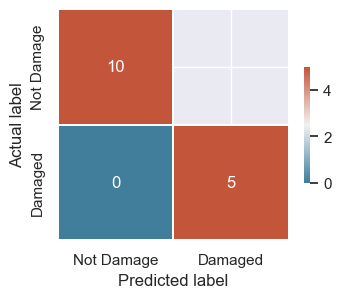

In [25]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         1
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         1
7           0         0
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         10.0  0.0
1          0.0  5.0




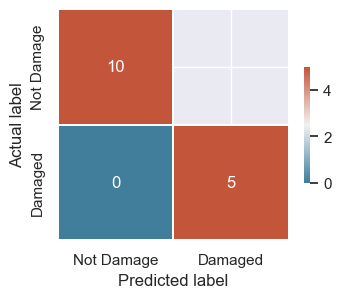

In [26]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         0
80          0         0
124         0         0
47          1         1
133         0         0
102         0         1
137         0         0
95          0         0
132         0         0
79          1         1
7           0         1
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      0.889     0.800     0.842        10
           1      0.667     0.800     0.727         5

    accuracy                          0.800        15
   macro avg      0.778     0.800     0.785        15
weighted avg      0.815     0.800     0.804        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original  0  1
Dominant      
0         8  1
1         2  4




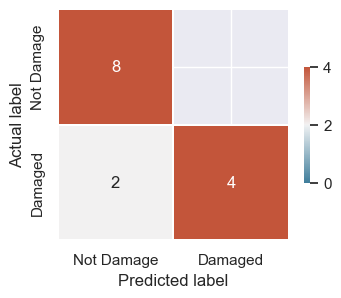

In [27]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

[0 1]


[0.63157895 0.36842105]


[[  0.          51.5         48.41666667  47.3452381   44.96428571
   43.45238095  44.26190476  42.46428571  44.45238095  46.04761905
   48.          49.70238095  48.0952381   46.63095238  45.45238095
   44.98809524  46.60714286  34.22619048  59.8452381   46.39880952
   47.36904762]
 [  1.          79.97959184  85.40816327  88.30612245  79.51020408
   87.75510204  90.34693878  87.63265306  84.32653061  87.83673469
   95.87755102  92.32653061  89.71428571  84.67346939  78.30612245
   85.81632653  91.24489796  55.97959184 120.02040816  86.81632653
   82.61360544]]


[[ 0.         -0.0371402   0.06587813  0.01250442  0.04610214 -0.0519797
  -0.08059294  0.07833869 -0.02153725 -0.0769398  -0.05466131  0.00608134
   0.04306348  0.02489997 -0.04398012  0.04751329  0.01424426 -0.24211162
   0.36488187 -0.00669422 -0.00051082]]


     Original  Dominant
105         0         0
68          1         1
80          0         0
124         0         0
47          

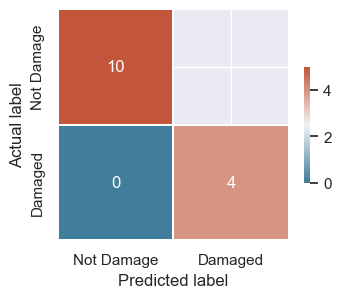

In [28]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         1
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         0
7           0         0
112         0         0
24          1         0
13          1         1


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




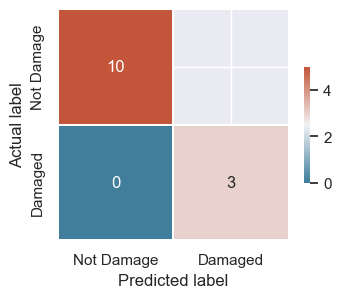

In [29]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         0
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         0
7           0         0
112         0         0
24          1         0
13          1         1


              precision    recall  f1-score   support

           0      0.769     1.000     0.870        10
           1      1.000     0.400     0.571         5

    accuracy                          0.800        15
   macro avg      0.885     0.700     0.720        15
weighted avg      0.846     0.800     0.770        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original     0    1
Dominant           
0         10.0  3.0
1          0.0  2.0




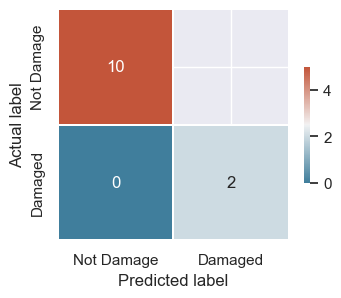

In [30]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         1
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         0
7           0         0
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      0.909     1.000     0.952        10
           1      1.000     0.800     0.889         5

    accuracy                          0.933        15
   macro avg      0.955     0.900     0.921        15
weighted avg      0.939     0.933     0.931        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         10.0  1.0
1          0.0  4.0




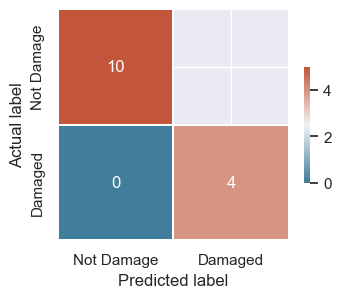

In [31]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         0
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         0
7           0         0
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




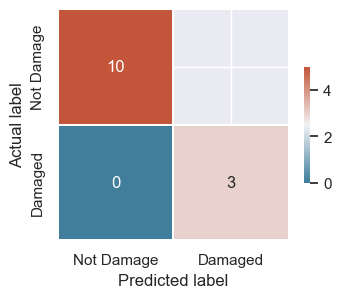

In [32]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
105         0         0
68          1         0
80          0         0
124         0         0
47          1         1
133         0         0
102         0         0
137         0         0
95          0         0
132         0         0
79          1         0
7           0         0
112         0         0
24          1         1
13          1         1


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




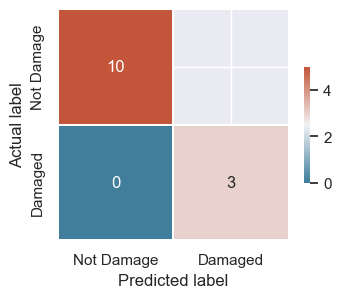

In [33]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_min_max.append(round(acc, 2))

In [34]:
#STOP

## 32

In [35]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.66590286]


Coefficeients:  [[ 7.38693216e+00 -4.16896168e-02  2.75838217e-02  2.80646455e-02
  -1.45839596e-02 -1.91696955e-03 -2.82625106e-03  2.06478746e-02
  -1.43090606e-02 -2.50286392e-02 -2.78396763e-03  2.75025190e-03
   1.76945039e-02  1.38977527e-02 -5.91691893e-02  1.71476895e-02
   1.18481640e-02 -1.39235124e-01  1.33550641e-01 -1.41705937e-03
  -1.61668707e-02]]


     Original  Dominant
101         0         0
69          0         0
81          1         1
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         1
72          1         1
22          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                        

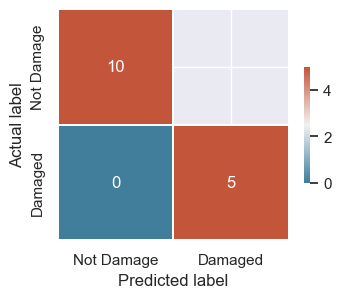

In [36]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         1
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         1
72          1         1
22          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000         5

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         10.0  0.0
1          0.0  5.0




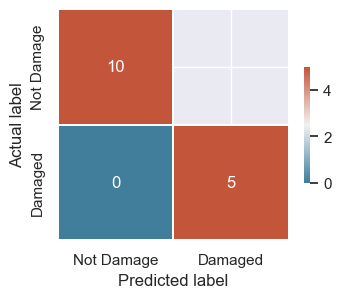

In [37]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         0
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         1
72          1         0
22          1         1


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




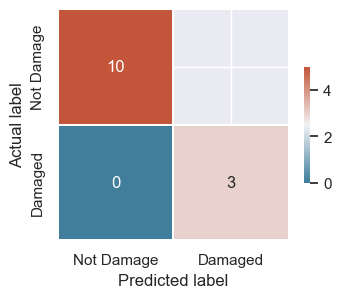

In [38]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

[0 1]


[0.63157895 0.36842105]


[[  0.          51.5         48.88095238  47.07142857  44.88095238
   44.04761905  44.97619048  43.4047619   45.75        46.30952381
   48.55952381  50.69047619  48.01190476  46.88095238  46.39285714
   45.96428571  46.89285714  34.44047619  60.33333333  46.88839286
   48.77142857]
 [  1.          79.7755102   85.63265306  87.87755102  80.42857143
   88.91836735  91.55102041  89.04081633  85.85714286  89.2244898
   96.93877551  93.75510204  92.18367347  84.14285714  77.91836735
   86.3877551   91.02040816  56.06122449 121.08163265  87.54081633
   85.37278912]]


[[ 0.         -0.00987252  0.0701713  -0.01539708  0.0683377  -0.07684612
  -0.06440032  0.09114918 -0.03849226 -0.04270954 -0.03447095 -0.00489623
   0.03505561  0.04634227 -0.07968738  0.05178719  0.01605869 -0.28441047
   0.34722819 -0.00142591  0.00767349]]


     Original  Dominant
101         0         0
69          0         0
81          1         1
123         0         0
116         

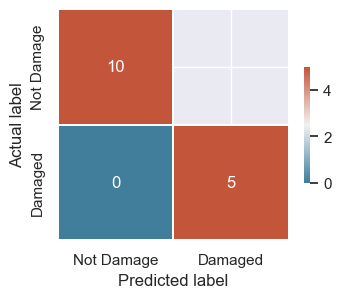

In [39]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         1
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         0
72          1         0
22          1         1


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




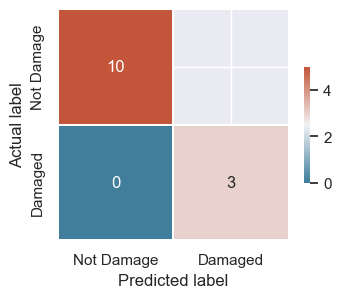

In [40]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         0
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         0
72          1         0
22          1         0


              precision    recall  f1-score   support

           0      0.714     1.000     0.833        10
           1      1.000     0.200     0.333         5

    accuracy                          0.733        15
   macro avg      0.857     0.600     0.583        15
weighted avg      0.810     0.733     0.667        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original     0    1
Dominant           
0         10.0  4.0
1          0.0  1.0




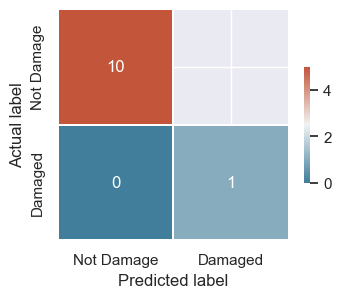

In [41]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         1
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         1
72          1         0
22          1         0


              precision    recall  f1-score   support

           0      0.833     1.000     0.909        10
           1      1.000     0.600     0.750         5

    accuracy                          0.867        15
   macro avg      0.917     0.800     0.830        15
weighted avg      0.889     0.867     0.856        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original     0    1
Dominant           
0         10.0  2.0
1          0.0  3.0




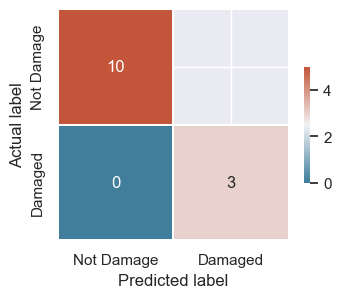

In [42]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         0
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         0
72          1         0
22          1         0


              precision    recall  f1-score   support

           0      0.714     1.000     0.833        10
           1      1.000     0.200     0.333         5

    accuracy                          0.733        15
   macro avg      0.857     0.600     0.583        15
weighted avg      0.810     0.733     0.667        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original     0    1
Dominant           
0         10.0  4.0
1          0.0  1.0




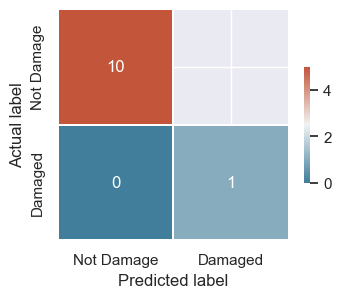

In [43]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
101         0         0
69          0         0
81          1         0
123         0         0
116         0         0
3           0         0
88          0         0
67          0         0
30          1         1
63          0         0
5           0         0
134         0         0
128         1         0
72          1         0
22          1         1


              precision    recall  f1-score   support

           0      0.769     1.000     0.870        10
           1      1.000     0.400     0.571         5

    accuracy                          0.800        15
   macro avg      0.885     0.700     0.720        15
weighted avg      0.846     0.800     0.770        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original     0    1
Dominant           
0         10.0  3.0
1          0.0  2.0




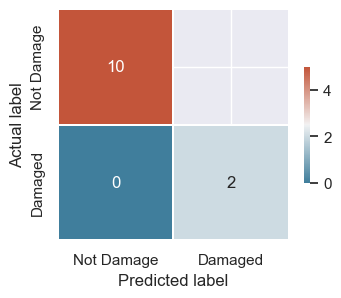

In [44]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [45]:
#STOP

# Mean

## 16

In [46]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.38745208]


Coefficeients:  [[ 7.54763048e+00 -4.56528947e-02  2.31630486e-02  3.18727714e-02
  -3.35691344e-02  1.07998935e-02 -1.18830176e-02  2.57374427e-02
  -1.66892541e-02 -2.52354812e-02 -2.67016969e-02  2.68367204e-02
   1.78410943e-02 -4.49472426e-03 -7.04273688e-02  2.94258567e-02
   1.05307660e-02 -1.19953963e-01  1.37904709e-01 -3.65287364e-03
  -6.80136102e-03]]


     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         1
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                        

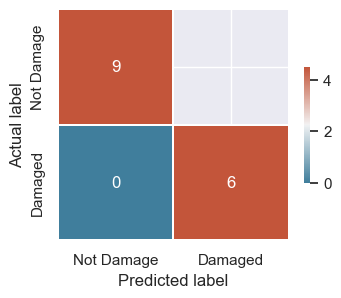

In [47]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         1
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         9.0  0.0
1         0.0  6.0




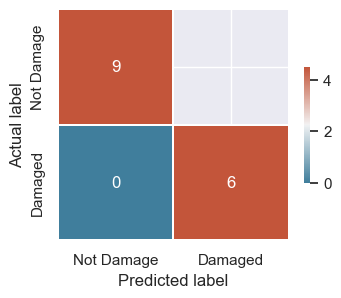

In [48]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         0
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




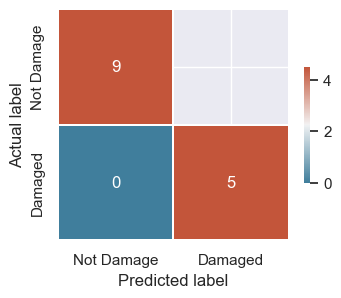

In [49]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

[0 1]


[0.63909774 0.36090226]


[[  0.          51.74117647  48.8         47.07058824  45.14117647
   43.95294118  45.21176471  43.08235294  45.55294118  46.10588235
   48.35294118  50.03529412  48.44705882  46.56470588  45.82352941
   45.48235294  46.64705882  34.22352941  60.38823529  46.75073529
   49.17882353]
 [  1.          80.45833333  84.5625      86.75        79.77083333
   86.6875      87.64583333  85.72916667  83.64583333  85.33333333
   93.66666667  91.39583333  89.625       81.95833333  75.02083333
   83.375       89.35416667  55.45833333 118.875       85.31119792
   84.08472222]]


[[ 0.          0.01050069  0.0433761   0.00490409  0.01650824 -0.0197273
  -0.06261525  0.1037761  -0.03692376 -0.06413827 -0.07777291  0.0281533
   0.05136335  0.04907741 -0.08741126  0.02574121  0.04620848 -0.36783079
   0.36298657  0.00166607  0.01112352]]


     Original  Dominant
26          1         0
91          0         0
6           0         0
83          1         1
118         0

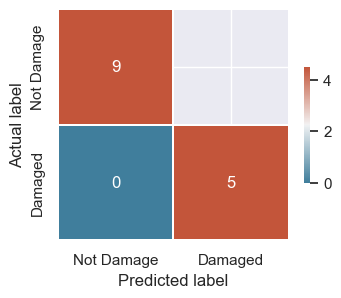

In [50]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         1
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         9.0  0.0
1         0.0  6.0




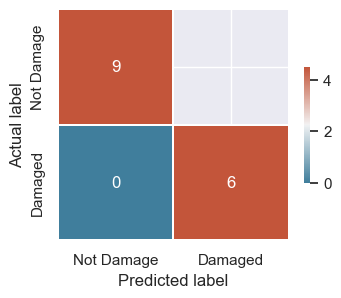

In [51]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         0
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




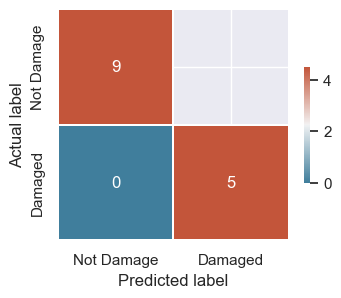

In [52]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         1
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         9.0  0.0
1         0.0  6.0




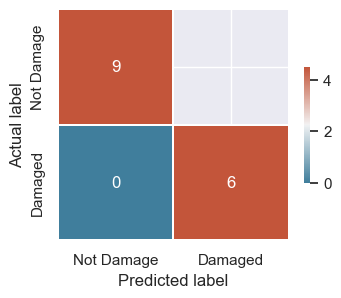

In [53]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         0
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         9.0  1.0
1         0.0  5.0




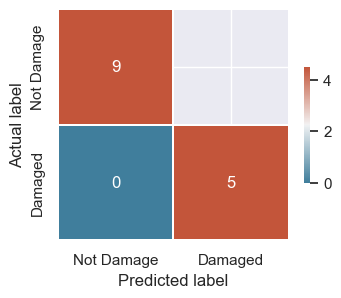

In [54]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
26          1         1
91          0         0
6           0         0
83          1         1
118         0         0
67          0         0
37          1         1
121         0         0
56          0         0
76          0         0
33          1         1
46          1         1
59          0         0
51          0         0
39          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         9.0  0.0
1         0.0  6.0




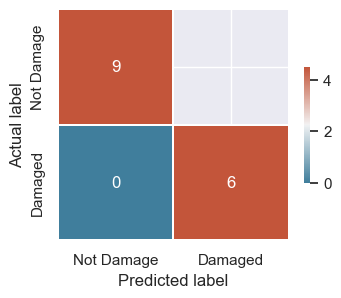

In [55]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_mean.append(round(acc, 2))

In [56]:
#STOP

## 32

In [57]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.39863441]


Coefficeients:  [[ 7.62212000e+00 -5.16609879e-02  2.37901949e-02  4.00404268e-02
  -2.41131284e-02  1.37170097e-03 -3.94085529e-03  8.93540428e-03
  -2.28763241e-02  6.15643429e-03 -1.39329724e-02  1.13007754e-02
   7.11356678e-03  7.78056142e-03 -6.76170473e-02  1.50625887e-02
   1.22327140e-02 -1.10814106e-01  1.32305385e-01 -3.14730926e-03
  -1.20384414e-02]]


     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         1
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         7
           1      1.000     1.000     1.000         8

    accuracy                        

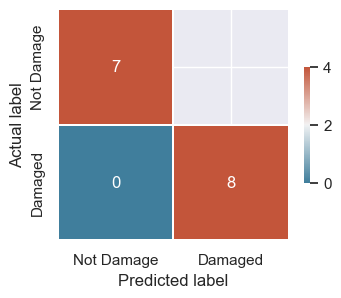

In [58]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         1
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         7
           1      1.000     1.000     1.000         8

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         7.0  0.0
1         0.0  8.0




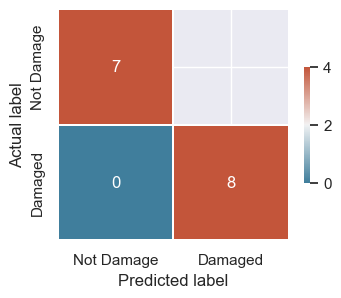

In [59]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         1
36          1         1
70          1         0
9           0         1
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         1
37          1         1


              precision    recall  f1-score   support

           0      0.800     0.571     0.667         7
           1      0.700     0.875     0.778         8

    accuracy                          0.733        15
   macro avg      0.750     0.723     0.722        15
weighted avg      0.747     0.733     0.726        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original  0  1
Dominant      
0         4  1
1         3  7




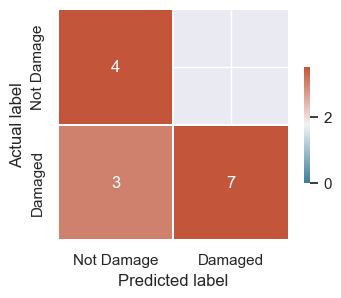

In [60]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

[0 1]


[0.65413534 0.34586466]


[[  0.          51.47126437  48.82758621  46.87356322  44.32183908
   43.25287356  44.36781609  42.40229885  44.5862069   45.
   47.94252874  49.83908046  47.83908046  46.82758621  45.40229885
   45.03448276  46.03448276  33.98850575  59.85057471  46.25143678
   48.44827586]
 [  1.          84.13043478  87.65217391  89.06521739  81.80434783
   85.60869565  88.32608696  87.02173913  83.36956522  86.08695652
   95.39130435  93.43478261  89.17391304  82.34782609  76.89130435
   83.58695652  89.47826087  57.91304348 119.47826087  86.46059783
   81.38405797]]


[[ 0.00000000e+00 -2.06554059e-02  9.73699861e-02  2.87493315e-02
   3.83154064e-02 -3.98082259e-02 -4.67145684e-02  1.20435484e-01
  -2.24726158e-02 -3.14251065e-02 -6.04172264e-02  4.30093834e-02
   4.29176570e-02  6.00366182e-02 -4.47062548e-02  1.19993107e-02
   4.29996958e-02 -4.91014720e-01  3.04022195e-01  1.82454393e-02
   3.17957800e-04]]


     Original  Dominant
73          1         1
112

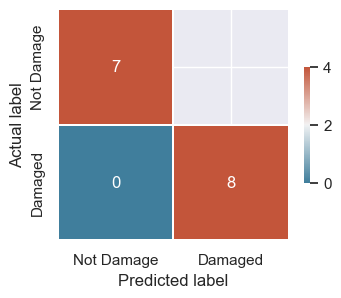

In [61]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         0
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      0.875     1.000     0.933         7
           1      1.000     0.875     0.933         8

    accuracy                          0.933        15
   macro avg      0.938     0.938     0.933        15
weighted avg      0.942     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         7.0  1.0
1         0.0  7.0




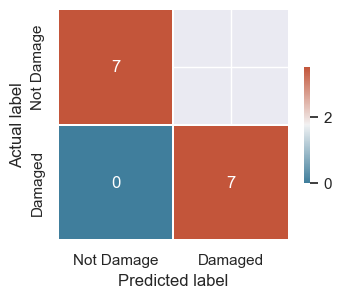

In [62]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         0
112         0         0
86          0         0
36          1         1
70          1         0
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         0
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      0.700     1.000     0.824         7
           1      1.000     0.625     0.769         8

    accuracy                          0.800        15
   macro avg      0.850     0.812     0.796        15
weighted avg      0.860     0.800     0.795        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original    0    1
Dominant          
0         7.0  3.0
1         0.0  5.0




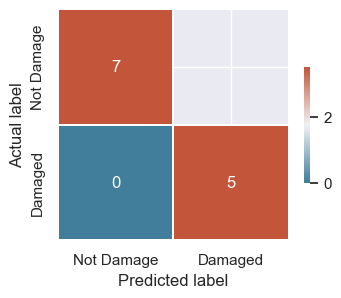

In [63]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         0
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      0.875     1.000     0.933         7
           1      1.000     0.875     0.933         8

    accuracy                          0.933        15
   macro avg      0.938     0.938     0.933        15
weighted avg      0.942     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         7.0  1.0
1         0.0  7.0




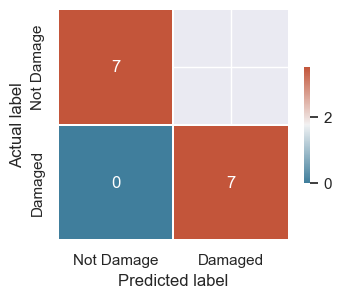

In [64]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         0
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      0.875     1.000     0.933         7
           1      1.000     0.875     0.933         8

    accuracy                          0.933        15
   macro avg      0.938     0.938     0.933        15
weighted avg      0.942     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         7.0  1.0
1         0.0  7.0




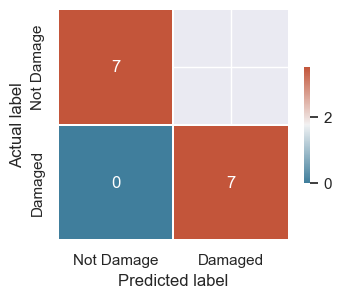

In [65]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
73          1         1
112         0         0
86          0         0
36          1         1
70          1         0
9           0         0
100         0         0
20          1         1
60          0         0
138         0         0
11          1         1
28          1         1
42          1         1
110         0         0
37          1         1


              precision    recall  f1-score   support

           0      0.875     1.000     0.933         7
           1      1.000     0.875     0.933         8

    accuracy                          0.933        15
   macro avg      0.938     0.938     0.933        15
weighted avg      0.942     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         7.0  1.0
1         0.0  7.0




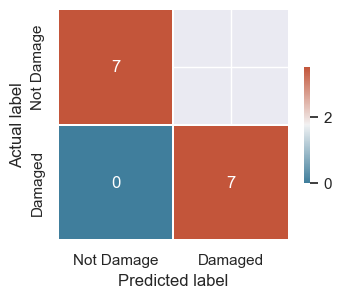

In [66]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [67]:
#STOP

# Performance

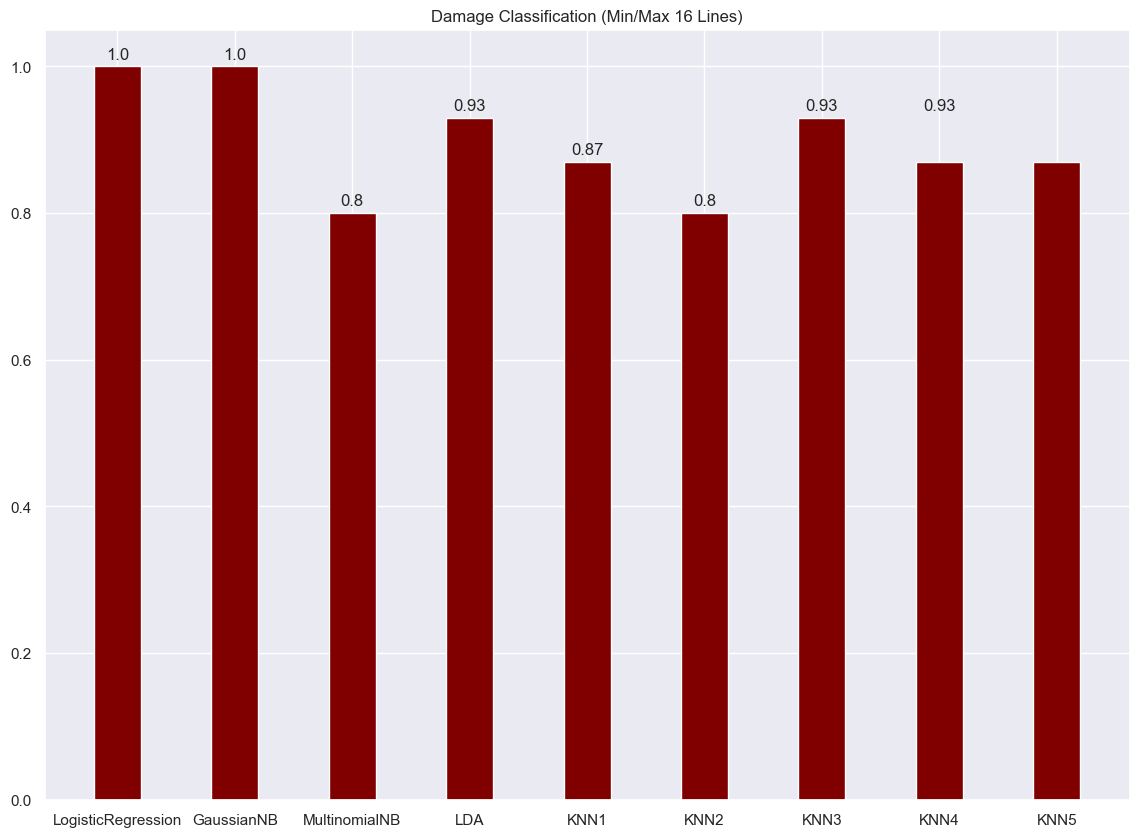

In [68]:
data = {'LogisticRegression':accuracy_sixteen_min_max[0], 'GaussianNB':accuracy_sixteen_min_max[1],
        'MultinomialNB':accuracy_sixteen_min_max[2], 'LDA':accuracy_sixteen_min_max[3],
        'KNN1':accuracy_sixteen_min_max[4], 'KNN2':accuracy_sixteen_min_max[5], 'KNN3':accuracy_sixteen_min_max[6],
       'KNN4':accuracy_sixteen_min_max[7], 'KNN5':accuracy_sixteen_min_max[8]}

plot_accuracy("Damage Classification (Min/Max 16 Lines)", data)

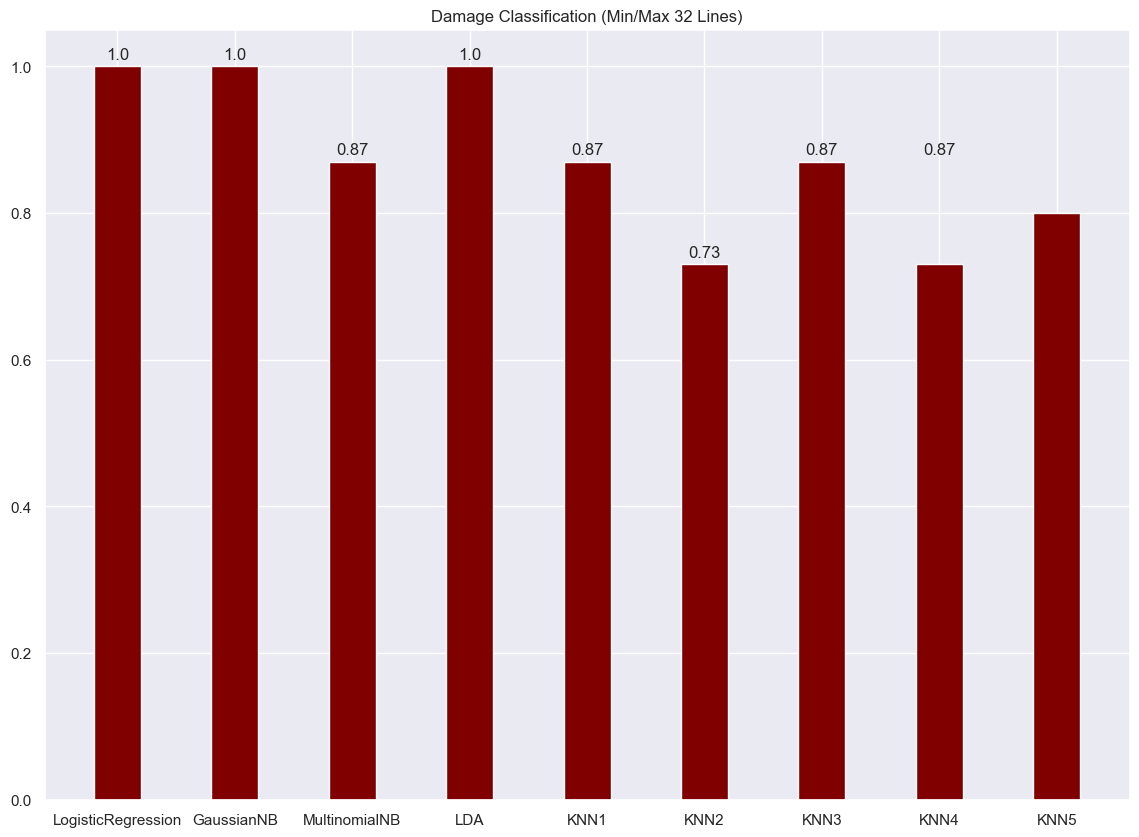

In [69]:
data = {'LogisticRegression':accuracy_thirtytwo_min_max[0], 'GaussianNB':accuracy_thirtytwo_min_max[1],
        'MultinomialNB':accuracy_thirtytwo_min_max[2], 'LDA':accuracy_thirtytwo_min_max[3],
        'KNN1':accuracy_thirtytwo_min_max[4], 'KNN2':accuracy_thirtytwo_min_max[5], 'KNN3':accuracy_thirtytwo_min_max[6],
       'KNN4':accuracy_thirtytwo_min_max[7], 'KNN5':accuracy_thirtytwo_min_max[8]}

plot_accuracy("Damage Classification (Min/Max 32 Lines)", data)

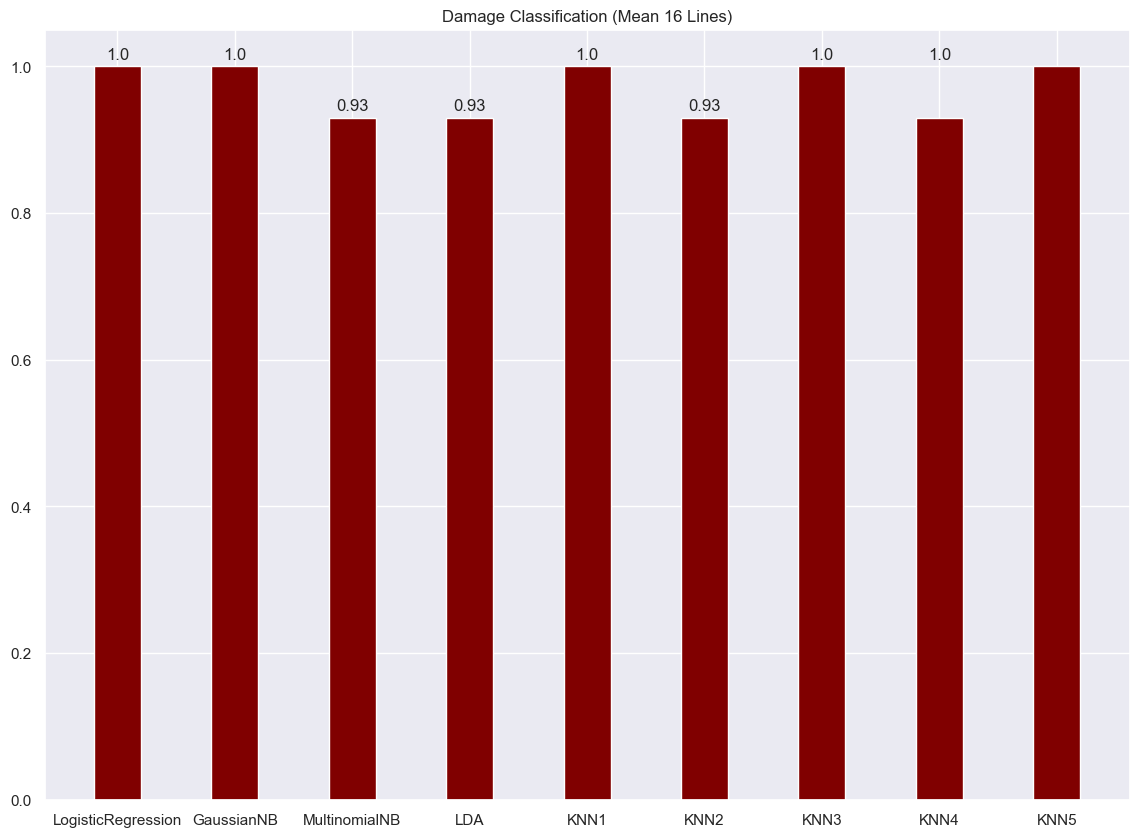

In [70]:
data = {'LogisticRegression':accuracy_sixteen_mean[0], 'GaussianNB':accuracy_sixteen_mean[1],
        'MultinomialNB':accuracy_sixteen_mean[2], 'LDA':accuracy_sixteen_mean[3],
        'KNN1':accuracy_sixteen_mean[4], 'KNN2':accuracy_sixteen_mean[5], 'KNN3':accuracy_sixteen_mean[6],
       'KNN4':accuracy_sixteen_mean[7], 'KNN5':accuracy_sixteen_mean[8]}

plot_accuracy("Damage Classification (Mean 16 Lines)", data)

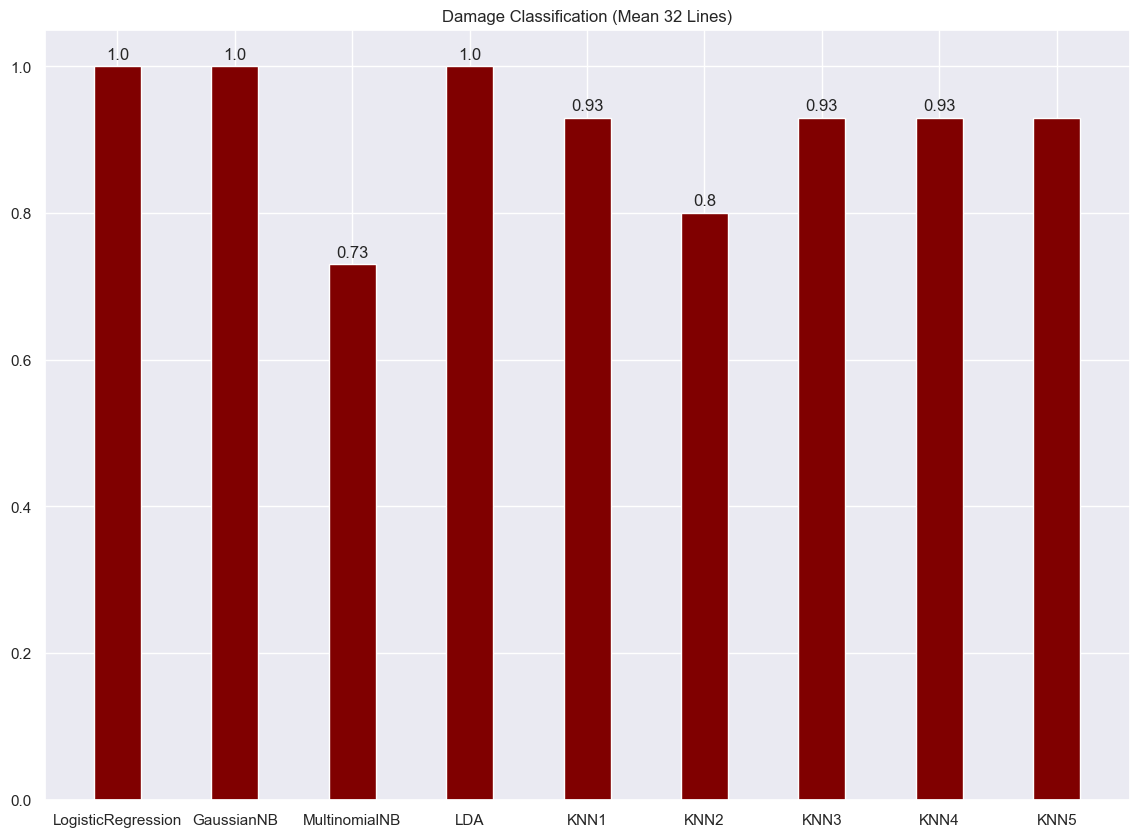

In [71]:
data = {'LogisticRegression':accuracy_thirtytwo_mean[0], 'GaussianNB':accuracy_thirtytwo_mean[1],
        'MultinomialNB':accuracy_thirtytwo_mean[2], 'LDA':accuracy_thirtytwo_mean[3],
        'KNN1':accuracy_thirtytwo_mean[4], 'KNN2':accuracy_thirtytwo_mean[5], 'KNN3':accuracy_thirtytwo_mean[6],
       'KNN4':accuracy_thirtytwo_mean[7], 'KNN5':accuracy_thirtytwo_mean[8]}

plot_accuracy("Damage Classification (Mean 32 Lines)", data)

In [72]:
#STOP